In [3]:
using Pkg
Pkg.activate(".")

Pkg.add("CairoMakie")
Pkg.add("Random")

using CairoMakie
using Random

CairoMakie.activate!(type="svg")

  Activating project at `c:\School\BS Thesis\src`

    Updating registry at `C:\Users\ioakimsy\.julia\registries\General.toml`


   Resolving package versions...


  No Changes to `C:\School\BS Thesis\src\Project.toml`
  No Changes to `C:\School\BS Thesis\src\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\School\BS Thesis\src\Project.toml`


  No Changes to `C:\School\BS Thesis\src\Manifest.toml`

In [5]:
set_theme!(theme_light())

In [1]:
function initiate_grid(type::String, L::Int=8)
    # May add line to ensure that L is even.
    if L%2 == 1
        L=L+1
    end

    grid = zeros(Int,L,L)

    if type == "center"
        grid[L÷2:L÷2+1,L÷2:L÷2+1] .= 1
    elseif type == "outer_corner"
        grid[1,1] = 1
        grid[1,end] = 1
        grid[end,1] = 1
        grid[end,end] = 1 
    elseif type == "inner_corner"
        grid[L÷4,L÷4] = 1
        grid[L÷4,end-L÷4+1] = 1
        grid[end-L÷4+1,L÷4] = 1
        grid[end-L÷4+1,end-L÷4+1] = 1
    else
        error("ERROR: Not a valid initital seating arrangement type")
    end

    return grid
end

initiate_grid (generic function with 2 methods)

In [2]:
function initiate_grid_rand(num_learned::Int=4,L::Int=8)
    grid = zeros(Int,L,L)

    while sum(grid) < num_learned
        grid[rand(1:L),rand(1:L)] = 1
    end

    return grid
end

initiate_grid_rand (generic function with 3 methods)

In [4]:
test_grid = initiate_grid_rand(4,10)

10×10 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1
 0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0

In [10]:
test_grid

10×10 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1
 0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0

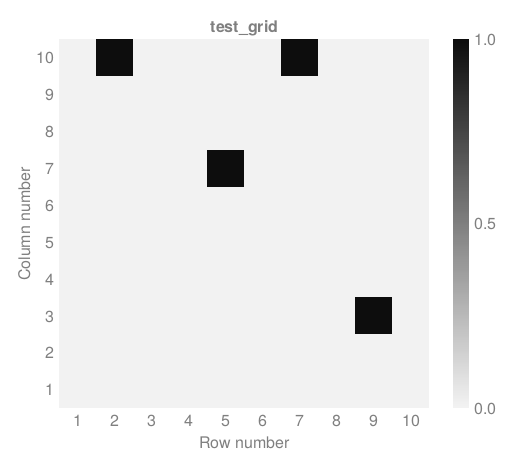

In [73]:
fig = Figure(; resolution=(512,512))
ax = Axis(fig[1,1];
    title="test_grid",
    xlabel="Row number",
    ylabel="Column number",
    xticks=1:10,
    yticks=1:10,
    aspect = 1
    )
hm = heatmap!(ax,test_grid,
colormap=Reverse(:grays)
)
rowsize!(fig.layout,1,Aspect(1,1))

Colorbar(fig[1,2],hm,vertical=true)

resize_to_layout!(fig)
fig

In [72]:
hm.attributes

Attributes with 19 entries:
  color => Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 1.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
  colormap => Reverse{Symbol}(:grays)
  colorrange => Float32[0.0, 1.0]
  depth_shift => 0.0
  fxaa => true
  highclip => RGBA{Float32}(0.05,0.05,0.05,1.0)
  inspectable => true
  interpolate => false
  levels => 1
  linewidth => 0.0
  lowclip => RGBA{Float32}(0.95,0.95,0.95,1.0)
  model => Float32[1.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0; 0.0 0.0 1.0 0.0; 0.0 0.0 0.0 1.0]
  nan_color => transparent
  overdraw => false
  space => data
  ssao => false
  transformation => Automatic()
  transparency => false
  visible => true